# Heart Disease Prediction

**PROBLEM STATEMENT**

In this project,I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

**Import Libraries**

Let's import all the necessary Libraries.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Now,I have imported all the machine learning algorithms I will be using.

In [41]:
# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Import Dataset**

I have used pandas `read_csv` method to read the dataset since The dataset is stored in the file dataset.csv

In [66]:
df = pd.read_csv(r"C:\Users\v-dmanasa\Downloads\dataset.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Let us now understand the data with `describe()` and `info()` before visualizing and preprocessing 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. 
There are a total of 13 features along with one target value

In [67]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

Let's us now visualize the data for better understanding before moving to data pre-processing

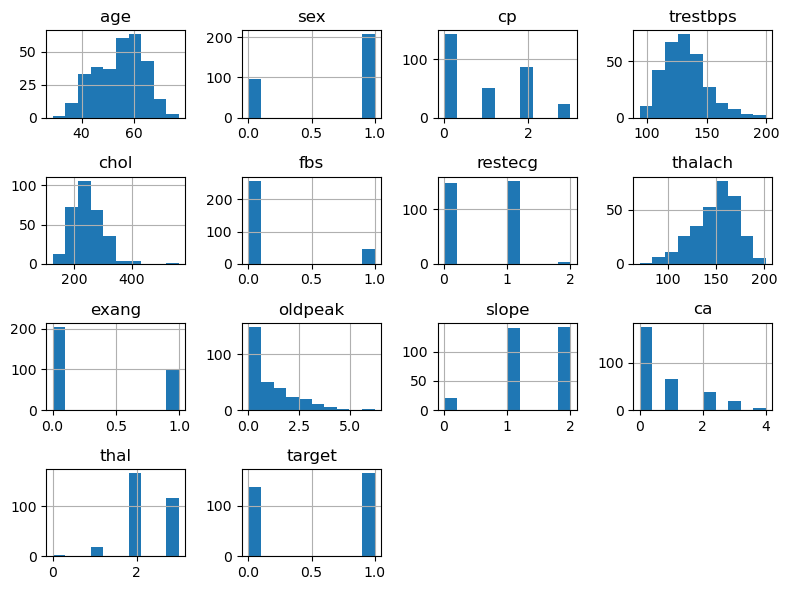

In [68]:
# adjust the subplots
df.hist()

plt.tight_layout()

# display the plot
plt.show()

I can see that each feature has a different range of distribution.Thus scaling has to be done

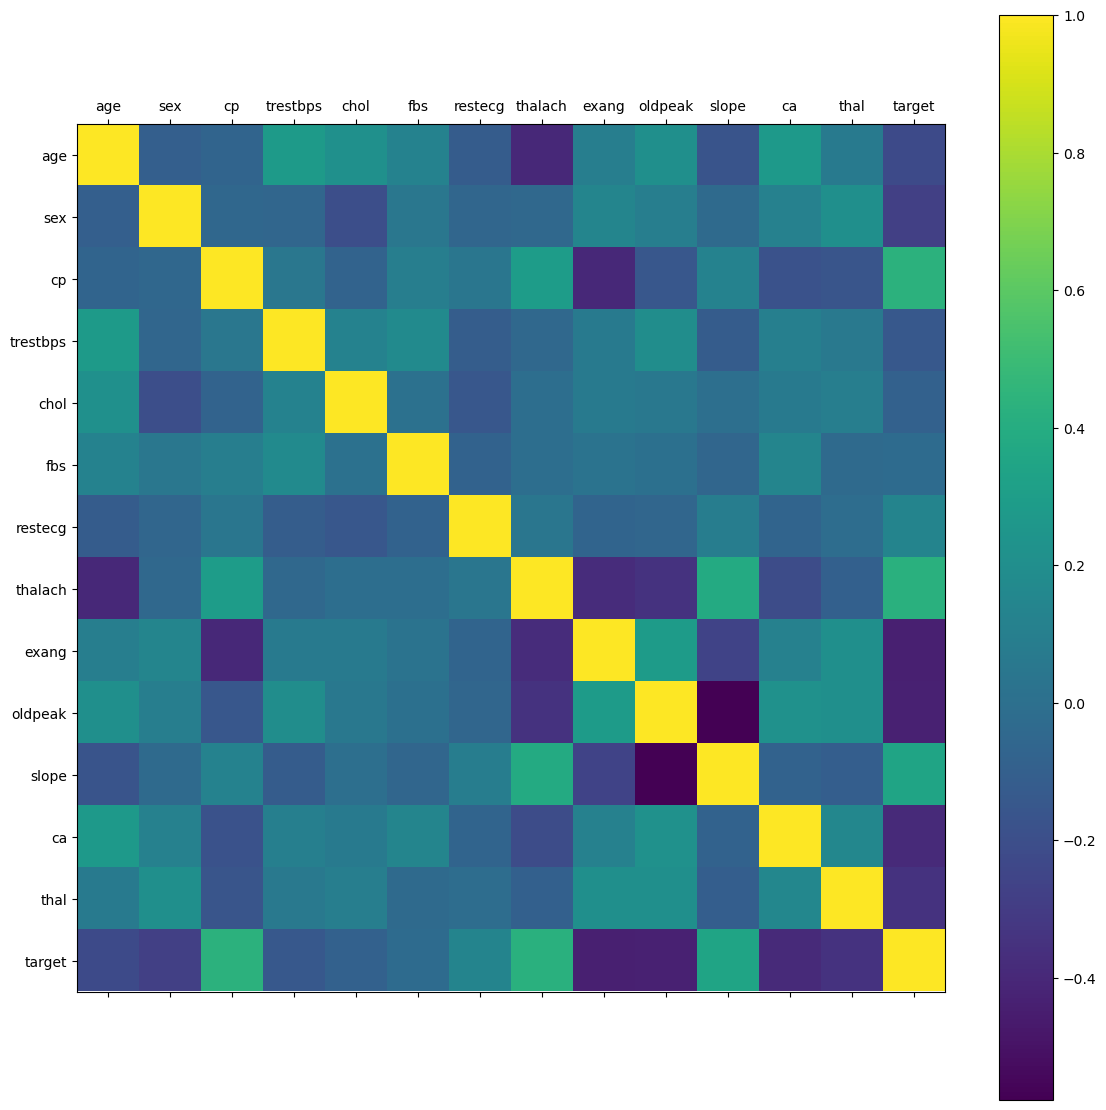

In [46]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

Few features have negative correlation with the target value while some have positive.

Text(0.5, 1.0, 'Count of each Target Class')

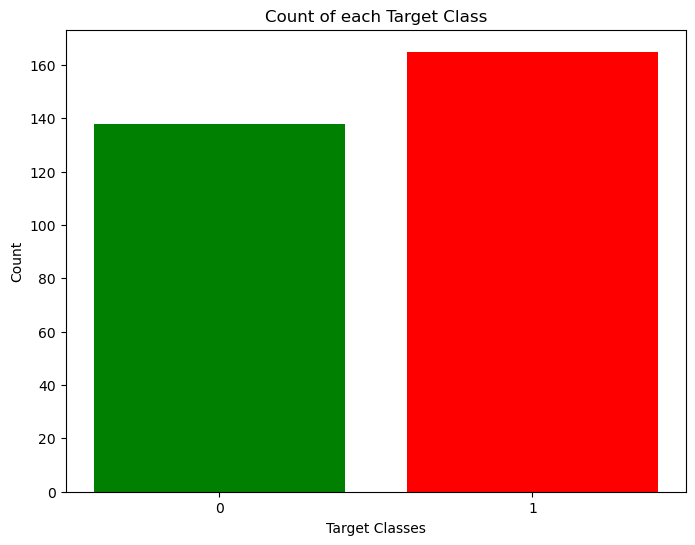

In [47]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

Data Processing

 I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [69]:
df = pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [70]:
standardscaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardscaler.fit_transform(df[columns_to_scale])

Machine Learning

In [71]:
X = df.drop('target',axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (212, 30)
y_train (212,)
X_test (91, 30)
y_test (91,)


Create a generalized function to calculate the performance metrics for the test set.

In [76]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

**K Nearest Neighbors (KNN)**

In [54]:
# instantiate the 'KNeighborsClassifier'
knn_classification = KNeighborsClassifier(n_neighbors = 8)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

Calculate performance measures on the test set.

In [77]:
# compute the performance measures on test data
test_report = get_test_report(knn_model, test_data = X_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.88      0.89      0.88        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



**Interpretation:** The accuracy is 88% for this model.

**Decision Tree Classifier**

In [79]:
decisionclassifier = DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_tree = decisionclassifier.fit(X_train,y_train)

In [80]:
test_report = get_test_report(decision_tree,X_test)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.66      0.72        44
           1       0.73      0.85      0.78        47

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91



**Interpretation:** The accuracy is 76% for this model.

**RandomForestClassifier**

In [82]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [83]:
test_report = get_test_report(rf_model,X_test)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.78      0.83      0.80        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



**Interpretation:** The accuracy is 79% for this model.

### Identify the Important Features

In [ ]:
Let us create a barplot to identify the important feature in dataset

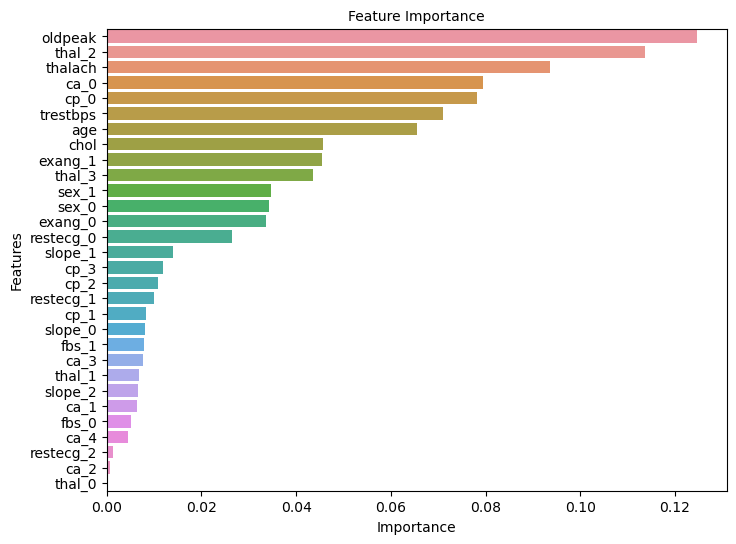

In [89]:
important_feature = pd.DataFrame({'Features':X_train.columns,
                                 'Importance':rf_model.feature_importances_})

important_feature=important_feature.sort_values('Importance',ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_feature)

plt.title('Feature Importance', fontsize = 10)
plt.xlabel('Importance', fontsize = 10)
plt.ylabel('Features', fontsize = 10)

# display the plot
plt.show()

**Interpretation:** From the above bar plot, we can see that `oldpeak` is the most important feature in the dataset.

## CONCLUSION

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. I then applied four Machine Learning algorithms- `K Neighbors Classifier`,`Decision Tree Classifier` and `Random Forest Classifier`.And also observed that old peak is the important feature in this dataset.In the end, `K Neighbors Classifier`achieved the highest score of `88%` with 3 nearest neighbors.